In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install tensorflow-gpu

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [ ]:
## import some basic libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
dataset=pd.read_csv("/content/drive/MyDrive/Churn_Modelling.csv")

In [ ]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
## Divide the dataset into independent and dependent features
X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [ ]:
## Feature Engineering
geo=pd.get_dummies(X['Geography'],drop_first=True)

In [ ]:
gen=pd.get_dummies(X['Gender'],drop_first=True)

In [ ]:
## concatenate these variables with dataframes
X=X.drop(['Geography','Gender'],axis=1)

In [ ]:
X=pd.concat([X,geo,gen],axis=1)

In [ ]:
# Splitting the dataset inro Training Set and Test Set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
# feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)


In [ ]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [ ]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [ ]:
X_train.shape

(8000, 11)

In [ ]:
## Part2 Now lets create the ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout

In [ ]:
## Let initiallize the ANN
classifier=Sequential()

In [ ]:
# Add the input layer
classifier.add(Dense(units=11,activation='relu'))

In [ ]:
# Add Hidden layer
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(0.3))

In [ ]:
# Add Hidden layer
classifier.add(Dense(units=7,activation='relu'))

In [ ]:
## Adding the output
classifier.add(Dense(1,activation='sigmoid'))

In [ ]:
import tensorflow as tf
opt=tf.keras.optimizers.Adam(learning_rate=0.01)

In [ ]:
## Early Stopping
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,

)

In [ ]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 4s 5ms/step - loss: 0.4227 - accuracy: 0.7962 - val_loss: 0.3911 - val_accuracy: 0.7955
Epoch 2/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.3599 - accuracy: 0.8604 - val_loss: 0.3742 - val_accuracy: 0.8504
Epoch 3/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.3483 - accuracy: 0.8617 - val_loss: 0.3658 - val_accuracy: 0.8512
Epoch 4/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.3365 - accuracy: 0.8705 - val_loss: 0.3746 - val_accuracy: 0.8485
Epoch 5/1000
536/536 [==============================] - 4s 7ms/step - loss: 0.3334 - accuracy: 0.8705 - val_loss: 0.3624 - val_accuracy: 0.8527
Epoch 6/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3277 - accuracy: 0.8707 - val_loss: 0.3634 - val_accuracy: 0.8538
Epoch 7/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.3311 - accuracy: 0.8653 - val_loss: 0.3651 - val_accuracy:

In [ ]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

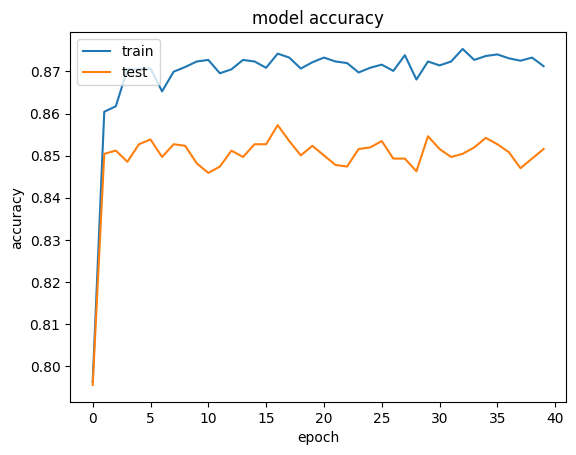

In [ ]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()



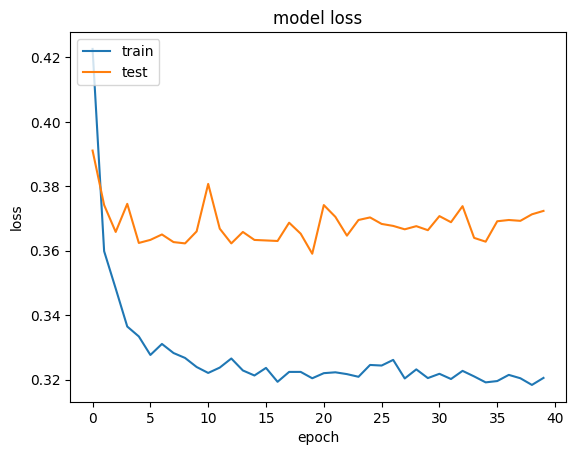

In [ ]:
# summarize history for accuracy
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [ ]:
## Making the prediction and evaluating the model
y_pred=classifier.predict(X_test)
y_pred=(y_pred>=0.5)

63/63 [==============================] - 0s 3ms/step


In [ ]:
## Make the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm


array([[1532,   63],
       [ 214,  191]])

In [ ]:
## Calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [ ]:
score

0.8615

In [ ]:
classifier.weights


[<tf.Variable 'dense/kernel:0' shape=(11, 11) dtype=float32, numpy=
 array([[-0.6482944 , -0.79582596, -0.29065308,  0.78309715, -0.07526105,
          0.17188983,  2.065585  , -0.20686008,  0.08389328, -0.8903969 ,
          0.23025325],
        [ 1.7698449 ,  4.564026  , -0.5947443 , -3.7834744 , -1.0429401 ,
         -3.8366015 , -1.3434049 ,  1.6837766 , -0.4963532 , -3.6189535 ,
          3.828824  ],
        [ 0.49322602, -1.3035784 , -0.26195636,  1.5024608 ,  2.037258  ,
          0.01431688,  0.68416476,  0.11612239,  2.2858899 , -2.0222092 ,
          0.75396305],
        [-3.6772923 ,  0.8751455 , -5.204759  , -0.16015697, -3.8205612 ,
         -0.7956595 , -2.8430934 ,  0.48046193, -4.0296483 , -0.91630703,
         -0.3964583 ],
        [-4.85772   , -2.1128168 ,  3.3194246 , -0.10689685, -1.5464352 ,
          0.4467388 ,  0.50279325,  5.494069  ,  0.6093349 ,  2.2473845 ,
          0.936906  ],
        [ 0.03812311,  0.03493181, -0.34892082,  0.98363626, -2.1088653 ,
   